In [2]:
pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 47.6 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import pandas as pd

In [7]:
mols = {
    "Propane": "CCC",
    "Ethene": "C=C",
    "Cyclohexane": "C1CCCCC1",
    "Buckminsterfullerene": "C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23"
}

rdkit_mols = {name: Chem.MolFromSmiles(smiles) for name, smiles in mols.items()}

In [15]:
for name, mol in rdkit_mols.items():
    print(f"\nMolecule: {name}")
    print("Number of atoms:", mol.GetNumAtoms())
    print("Atoms:")
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        weight = Descriptors.MolWt(Chem.MolFromSmiles(symbol))
        print(f"  {symbol} - Atomic weight: {weight:.2f}")

    aromatic_bonds = sum(1 for bond in mol.GetBonds() if bond.GetIsAromatic())
    print("Number of aromatic bonds:", aromatic_bonds)


Molecule: Propane
Number of atoms: 3
Atoms:
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
Number of aromatic bonds: 0

Molecule: Ethene
Number of atoms: 2
Atoms:
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
Number of aromatic bonds: 0

Molecule: Cyclohexane
Number of atoms: 6
Atoms:
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
Number of aromatic bonds: 0

Molecule: Buckminsterfullerene
Number of atoms: 60
Atoms:
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weight: 16.04
  C - Atomic weig

In [17]:
df = pd.read_csv("solubility (1).csv")
df.head()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


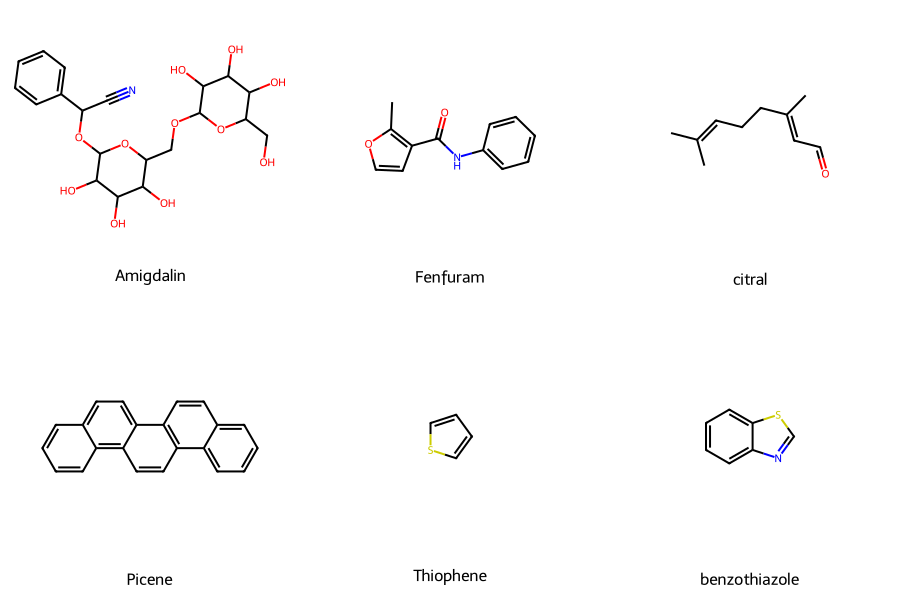

In [19]:
mols = [Chem.MolFromSmiles(s) for s in df["smiles"][:6]]
labels = list(df["Compound ID"][:6])
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,300), legends=labels)
img

##Challenges:

* Some molecules (like C60) may not render properly from SMILES without 3D coordinates.

* RDKit may throw warnings for invalid or complex SMILES (ignored safely).

##Improvements:

* Use 3D rendering with AllChem.EmbedMolecule for more realistic visualization.

* Compute additional properties like logP, molecular weight, and TPSA for deeper analysis.